# Project 2020 - Fundamentals of Data Analysis
Due: last commit on or before January 8th, 2021

Instructions

In this project you must perform and explain simple linear regression using Python
on the powerproduction dataset available on Moodle. The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis.

Your submission must be in the form of a git repository containing, at a minimum, the
following items:

1. Jupyter notebook that performs simple linear regression on the data set.
2. In that notebook, an explanation of your regression and an analysis of its accuracy.
3. Standard items in a git repository such as a README.

To enhance your submission, you might consider comparing simple linear regression to
other types of regression on this data set. Rest assured, all the above concepts will be
explored in lecture videos and other materials in the coming semester.

# Simple Linear Regression

**Simple linear regression is used to estimate the relationship between two quantitative variables.**
https://www.scribbr.com/statistics/simple-linear-regression/


Simple Linear Regression, for instance can be used to mearsure the relation of height / weight, as one variable such as weight increases, there is often a relationship where the other variable such as height increases. There is the normal Simple Linear Regression illustrating the growth of infant,child,teenager,adult gaining in height and weight, then there will be exceptions outside of the linear line for gigantism and obesity. People generally don't exceed 7ft in height, the linear graph will plateau at 7ft + in height.

>Some other examples of statistical relationships might include:<br>
Alcohol consumed and blood alcohol content — as alcohol consumption increases, you'd expect one's blood alcohol content to increase, but not perfectly.<br>
Vital lung capacity and pack-years of smoking — as amount of smoking increases (as quantified by the number of pack-years of smoking), you'd expect lung function (as quantified by vital lung capacity) to decrease, but not perfectly.<br>
Driving speed and gas mileage — as driving speed increases, you'd expect gas mileage to decrease, but not perfectly.<br>
Okay, so let's study statistical relationships between one response variable y and one predictor variable x!
https://online.stat.psu.edu/stat462/node/91/

In our case we will be using Simple linear regression to show the relationship between **Wind Speed** and **power** produced by a wind turbine.

The graph from the code below, provides a very effective illustration of power generated from wind.

As wind speed increases, power produced increases, until wind speeds exceed 24 mph and the turbine owner has to turn off the turbine. If there is zero wind speed or very low wind speeds, the graph shows us that there is not sufficient speed to generate power.

On our graph below we have dotted exceptions for windy days with no power, and there can be disparities for power surges where an exceptionally high amount of power was produced compared to days with similar wind.

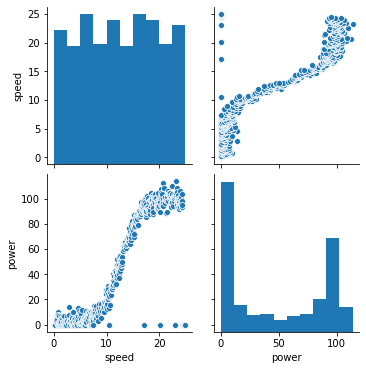

In [1]:
import seaborn as sns
import pandas as pd

powerproduction = pd.read_csv('powerproduction.csv')
sns.pairplot(powerproduction)



## Assumptions of simple linear regression

I do want to bring the reader's attention to this blog about the assumptions of simple linear regression.

>Simple linear regression is a parametric test, meaning that it makes certain assumptions about the data. These assumptions are:

>Homogeneity of variance (homoscedasticity): the size of the error in our prediction doesn’t change significantly across the values of the independent variable.<br>
>Independence of observations: the observations in the dataset were collected using statistically valid sampling methods, and there are no hidden relationships among observations.<br>
>Normality: The data follows a normal distribution.<br>
>Linear regression makes one additional assumption:<br>

>The relationship between the independent and dependent variable is linear: the line of best fit through the data points is a straight line (rather than a curve or some sort of grouping factor).<br>
If your data do not meet the assumptions of homoscedasticity or normality, you may be able to use a nonparametric test instead, such as the Spearman rank test.

https://www.scribbr.com/statistics/simple-linear-regression/

If you observe the graph above,it is true that the relationship between the independent variable (wind) and the dependent variable (power) is linear.

However using machine learning simple linear regression I found that sizeable errors were made in predicting the independent variable of power from the wind provided in the dataset.

I don't know if the the dataset were collected using statistically valid sampling methods, blogs which I read about energy production from wind seemed to indicate that usually 7mph -9mph winds are needed to generate energy (http://science.unctv.org/content/how-much-wind-does-wind-turbine-need). The wind turbine readings we were supplied with, energy was produced at far lower speeds of 0.325. Are we really looking at data from an industrial wind turbine, or are we doing analysis on some other dataset that appears to fit the linear model.

I also noticed that even between speeds which were quite close together there could be quite large variance in the power produced. That is why the graph shows a very wide linear line centimers thick or so in parts rather than milimeters thick. What is responsible for this? Are there relationships hidden from the observations? For instance just because wind is travelling at a certain speed on a certain day, the aerodynamics might not be such that the wind catches the turbine in the same way as another day with the same wind speed, alternatively two days with same wind speed but different power productions could be explained by the fact that the turbine could have been turned off for part of the day. Two days with the same wind speed, where one day produces significantly more energy than the previous day with the same wind speed could be explained to the fact that the owner of the turbine could have been testing and using a better energy generation system which can output more power from lower wind speed. It is my view that all of the above hidden relationships could have been going on, and it makes it very hard for a machine learning algorithm to correctly predict. Quirky things can happen where a machine learning algorithm predicts slightly higher power outputs for wind speeds that are slightly lower.
One of the main factors causing distortion in predictions was power surges in upper wind speeds, and with these distortions it was possible to enter windspeeds such as 2mph and get a negative energy prediction.
The only work around I found was to do linear prediction in smaller segments rather than as a whole.

![LinearAlgorithm.png](LinearAlgorithm.png)


In [5]:
import pandas as pd

powerproduction = pd.read_csv('powerproduction.csv')

print(powerproduction.describe())

            speed       power
count  500.000000  500.000000
mean    12.590398   48.014584
std      7.224991   41.614572
min      0.000000    0.000000
25%      6.324750    5.288000
50%     12.550500   41.645500
75%     18.775250   93.537000
max     25.000000  113.556000


https://stackoverflow.com/questions/22341271/get-list-from-pandas-dataframe-column

Pandas DataFrame columns are Pandas Series when you pull them out, which you can then call x.tolist() on to turn them into a Python list. Alternatively you cast it with list(x).

 # Spearman rank test

I tried a Spearman rank test on the correlation between wind speed and energy production, and it was found that the data samples were correlated.

Spearmans correlation coefficient: 0.819
Samples are correlated (reject H0) p=0.000



https://machinelearningmastery.com/how-to-calculate-nonparametric-rank-correlation-in-python/

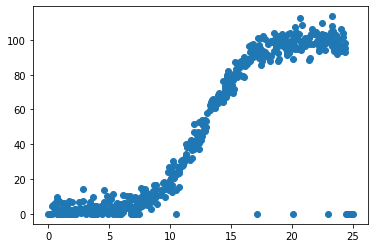

In [13]:
# https://machinelearningmastery.com/how-to-calculate-nonparametric-rank-correlation-in-python/
# generate related variables
from numpy.random import rand
from numpy.random import seed
from matplotlib import pyplot
import pandas as pd

powerproduction = pd.read_csv('powerproduction.csv')
# prepare data
data1 = powerproduction['speed'].tolist()
data2 = powerproduction['power'].tolist()
# plot
pyplot.scatter(data1, data2)
pyplot.show()




In [14]:
from numpy.random import rand
from numpy.random import seed
from scipy.stats import spearmanr
import pandas as pd

powerproduction = pd.read_csv('powerproduction.csv')
# prepare data
data1 = powerproduction['speed'].tolist()
data2 = powerproduction['power'].tolist()
# calculate spearman's correlation
coef, p = spearmanr(data1, data2)
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)


Spearmans correlation coefficient: 0.819
Samples are correlated (reject H0) p=0.000


In [1]:
import pandas as pd
df = pd.read_csv("powerproduction.csv")
print(df.head(5))

   speed  power
0  0.000    0.0
1  0.125    0.0
2  0.150    0.0
3  0.225    0.0
4  0.275    0.0


# A LOOK AT THE RAW DATASET

The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis.

What does a cursory glance of the data set show us?
From a cursory observation of the CSV data, wind speeds equal to 0.275 or below and equal to 24.499 or above generated no energy generated, there were also some other days when winds between these speeds generated zero power. 

What does the energy industry tell us about when wind turbines generate zero power?

1. It’s not windy enough for them to operate at all
2. The turbines need maintenance,
3. The turbines are being fixed
4. There is no demand on the grid for the supply of the energy.
5. It’s too windy for them to operate 


## Summary Of The Data
Wind speeds equal to 0.275 or below generate zero power.
Every speed between 0.325 (the lowest recorded value for generating power) and 24.399 (the highest power recorded for generating power), should generate power.
Anomalies when wind speed technically could generate power but doesn't (these can be explained by points 2,3 and 4 above)
Wind speeds equal to 24.499 or above generate zero power.

## Deal with the anomalies

The question is 'to accurately predict wind turbine power output from wind speed values using the data set as a basis'
Can power output from wind speed be accurately predicted if the anomalies are left in the data? I don't believe so.

Imagine the client coming to you on a windy day of 5mph, asking what the likely energy output is for the windspeed of today, and you telling him the wind energy output today will be zero because you are turning the wind turbine off because the grid doesn't need power. Your client's question is 'what the likely energy output is for the windspeed of today', your client wants to know how much energy a 5mph wind can produce. This is the question that we are answering.

We are taking the hypothesis




In [7]:
import pandas as pd

# https://dev.to/chanduthedev/how-to-display-all-rows-from-data-frame-using-pandas-dha

pd.set_option('display.max_rows', df.shape[0]+1)
df = pd.read_csv("powerproduction.csv")
print(df)

      speed    power
0     0.000    0.000
1     0.125    0.000
2     0.150    0.000
3     0.225    0.000
4     0.275    0.000
5     0.325    4.331
6     0.400    5.186
7     0.450    3.826
8     0.501    1.048
9     0.526    5.553
10    0.551    6.498
11    0.576    5.241
12    0.626    4.220
13    0.676    7.974
14    0.701    9.746
15    0.726    0.000
16    0.751    0.000
17    0.801    7.271
18    0.826    0.795
19    0.851    7.350
20    0.926    1.996
21    0.951    1.609
22    0.976    2.064
23    1.001    6.511
24    1.026    0.000
25    1.051    2.085
26    1.076    0.000
27    1.101    0.121
28    1.151    1.208
29    1.251    3.373
30    1.276    6.510
31    1.301    0.000
32    1.401    4.156
33    1.426    2.005
34    1.502    5.352
35    1.552    0.000
36    1.652    7.221
37    1.677    0.000
38    1.702    2.439
39    1.827    0.000
40    1.877    2.359
41    1.902    7.048
42    2.027    0.000
43    2.077    0.000
44    2.102    0.000
45    2.177    2.701
46    2.227  

In [2]:
import pandas as pd
df = pd.read_csv("powerproduction.csv")
is_power_zero =  df['power']==0.0
print(is_power_zero)

0      True
1      True
2      True
3      True
4      True
       ... 
495    True
496    True
497    True
498    True
499    True
Name: power, Length: 500, dtype: bool


In [3]:
show_zeros = df[is_power_zero]
print(show_zeros.shape)

(49, 2)


In [4]:
print(show_zeros)

      speed  power
0     0.000    0.0
1     0.125    0.0
2     0.150    0.0
3     0.225    0.0
4     0.275    0.0
15    0.726    0.0
16    0.751    0.0
24    1.026    0.0
26    1.076    0.0
31    1.301    0.0
35    1.552    0.0
37    1.677    0.0
39    1.827    0.0
42    2.027    0.0
43    2.077    0.0
44    2.102    0.0
47    2.252    0.0
60    3.128    0.0
65    3.504    0.0
67    3.579    0.0
70    3.679    0.0
73    3.779    0.0
74    3.804    0.0
75    3.879    0.0
83    4.429    0.0
89    4.880    0.0
105   5.556    0.0
110   5.781    0.0
111   5.806    0.0
114   5.931    0.0
133   6.782    0.0
135   6.857    0.0
136   6.957    0.0
140   7.107    0.0
149   7.432    0.0
208  10.511    0.0
340  17.167    0.0
404  20.095    0.0
456  22.998    0.0
490  24.499    0.0
491  24.525    0.0
492  24.575    0.0
493  24.650    0.0
494  24.750    0.0
495  24.775    0.0
496  24.850    0.0
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0
